In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data) #into numppy array
m ,n =data.shape #(m rows n feaurues +1 label col col labels))
np.random.shuffle(data) 
data_dev =data[0:1000].T # take the firdt 1000 rows for test 
Y_dev =data_dev[0] #extract the label
X_dev =data_dev[1:n]

data_train =data[1000:m].T
Y_train =data_train[0] #extract the label 
X_train =data_train[1:n]



In [5]:
X_train[:,0].shape
X_train = X_train / 255. #normalization
X_dev = X_dev / 255.


In [6]:
def init_params():
    w1 = np.random.randn(128, 784) * 0.01
    b1 = np.zeros((128, 1))
    w2 = np.random.randn(10, 128) * 0.01
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2


    
def ReLU(z):
    return np.maximum(0,z)
    
def softmax(z):
    exp = np.exp(z - np.max(z, axis=0))  # for numerical stability
    return exp / np.sum(exp, axis=0)

    
def forward_prop(w1,b1,w2,b2,X):
    z1 =w1.dot(X) +b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1 ,a1,z2,a2

def one_hot(Y):
    one_hot_Y =np.zeros((Y.size ,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] =1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def ReLU_deriv(z):
    return z >0


def back_prop(z1, a1, a2, w2, w1, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = (1 / m) * dz2.dot(a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    dw1 = (1 / m) * dz1.dot(X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2
    
def update_params(w1,b1,w2,b2,dw1,dw2,db1,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1 ,b1,w2,b2
    
    

    

In [7]:

def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_decent(X,Y,alpha ,iterations):
    w1,b1,w2,b2 =init_params()
    for i in range (iterations):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,X)
        dw1, db1, dw2, db2 = back_prop( z1, a1, a2, w2, w1, X, Y)
        w1, b1, w2, b2 = update_params(w1,b1,w2,b2,dw1,dw2,db1,db2,alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, Y))
    return w1, b1, w2, b2
        

In [8]:
w1, b1, w2, b2 = gradient_decent(X_train, Y_train, 0.1, 500)


Iteration:  0
[9 9 3 ... 6 6 6] [9 2 6 ... 1 7 5]
0.08392682926829269
Iteration:  10
[9 0 3 ... 1 1 0] [9 2 6 ... 1 7 5]
0.4410731707317073
Iteration:  20
[9 0 6 ... 1 1 0] [9 2 6 ... 1 7 5]
0.4812439024390244
Iteration:  30
[9 0 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.4907073170731707
Iteration:  40
[9 0 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.5293414634146342
Iteration:  50
[9 0 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.6106829268292683
Iteration:  60
[9 0 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.6764146341463415
Iteration:  70
[9 3 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.7125853658536585
Iteration:  80
[9 2 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.7485609756097561
Iteration:  90
[4 2 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.7765121951219512
Iteration:  100
[4 2 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.7955121951219513
Iteration:  110
[4 2 6 ... 1 7 0] [9 2 6 ... 1 7 5]
0.8099268292682927
Iteration:  120
[9 2 6 ... 1 7 5] [9 2 6 ... 1 7 5]
0.8219756097560975
Iteration:  130
[9 2 6 ... 1 7 5] [9 2 6 ... 1 7 5]
0.832390243902439
Iteration:  140
[

In [9]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


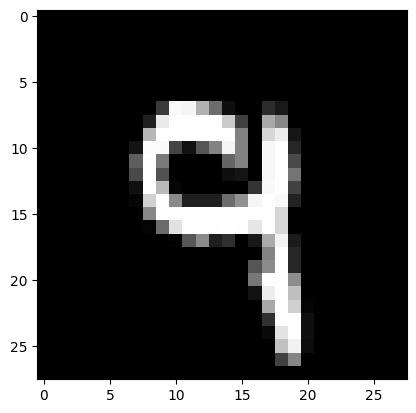

Prediction:  [3]
Label:  2


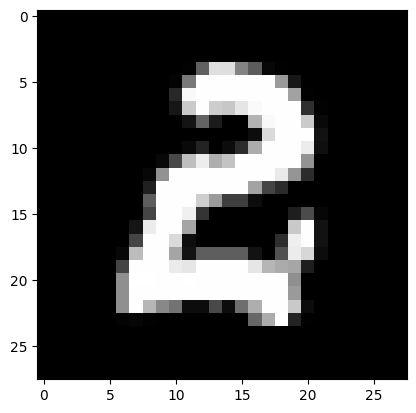

Prediction:  [6]
Label:  6


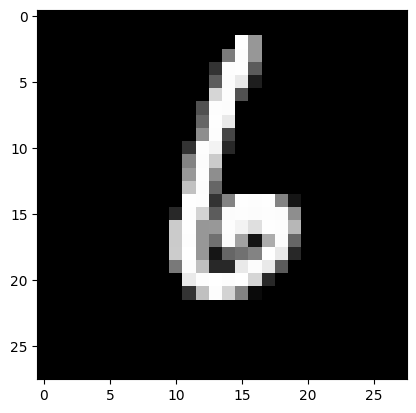

Prediction:  [5]
Label:  5


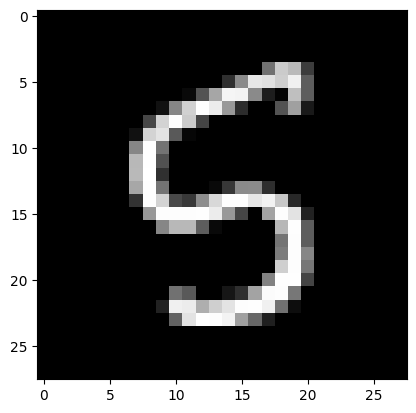

In [10]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1,w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)